# Loan Default Prediction

* Can you predict if an applicant will default the loan or not in the future?

## Problem Statement

* MyHom is a finance company that lends housing loans at the best and most affordable interest rates to customers. In recent times, the company incurred heavy losses due to loan defaults. Most applicants failed to repay the loan as per the promissory note.


* In order to avoid such losses, the company has decided to build a system for identifying the loan defaulters automatically based on data. This will help the company to identify the potential applicants and ensure the smooth running of the entire process.


* Now, the company challenges the Data Science community to build a smart AI system to predict the probability of an applicant defaulting the loan or not in the future.


## About the Dataset



* Here we have the past applicant’s data containing the demographic information, loan attributes, and target variable indicating if an applicant will default the loan or not.
* Here we have 3 files - train.csv, test.csv, and sample_submission.csv


## Train and Test Data



* The train and test set contains the different attributes related to demographic and loan information of the applicants such as age, profession, no. of active loans, loan default in previous loans, and so on. The training set contains the target variable loan_default and you need to predict the target variable in the test set.

##  Data Defination

**1)loan_id :Unique identifier of a loan**

**2)age : Age of the Applicant**

**3)Education :Applicant Education**

**4)proof_submitted :Type of proof submitted**

**5)loan_amount :Loan Amount Disbursed**

**6)asset_cost :The total asset value of the applicant**

**7)no_of_loans :No. of the loans taken by the applicant**

**8)no_of_curr_loans :No. of active loans held by the applicant**

**9)last_delinq_none :The loan defaulted in at least one of the past loans**

**10)loan_default (Target Variable) :0/1 indicating if an applicant will default the loan or not**


## Importing Library

In [211]:
#For mathematical calculation

import numpy as np

# For dataframe and series mainpulation 

import pandas as pd

# It is used for plotting statistical graphics
import seaborn as sns

# Setting the background theme
sns.set_theme(style="darkgrid")

# 'Matplotlib' is a data visualization library
import matplotlib.pyplot as plt
%matplotlib inline


## Load Data

In [212]:
# Reading the data using pandas

Train_data = pd.read_csv("Data set/train_LZV4RXX.csv")

# Displaying the first 5 records

Train_data.head(5)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [213]:
# Checking the shape of the dataframe

Train_data.shape

(7000, 10)

* Here the original dataset contains 7000 records and 10 features

In [214]:
# Here we copying the original data for future reference

Original_Train_data = Train_data.copy()

## Basic Information of Data

In [215]:
#Here we can see the data type of the features

Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


## Statistical Summary of Data

In [216]:
# By using Describe we can see the suumary of the numerical data

Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.5,5250.25,7000.0
age,7000.0,36.096571,7.587700,21.0,29.00,36.0,43.00,50.0
education,6755.0,1.561954,0.496184,1.0,1.00,2.0,2.00,2.0
loan_amount,7000.0,663355.172571,149812.773669,167880.0,577788.00,657108.0,737364.00,1781376.0
asset_cost,7000.0,916299.750857,214492.244573,473352.0,797901.00,858426.0,957675.00,2419200.0
no_of_loans,7000.0,2.853286,5.471932,0.0,0.00,0.0,3.00,109.0
no_of_curr_loans,7000.0,1.371143,2.189278,0.0,0.00,0.0,2.00,33.0
last_delinq_none,7000.0,0.013286,0.114504,0.0,0.00,0.0,0.00,1.0
loan_default,7000.0,0.400000,0.489933,0.0,0.00,0.0,1.00,1.0


In [217]:
# Summary of categorigal data

Train_data.describe(include = object)


,proof_submitted
count,7000
unique,5
top,Aadhar
freq,5931


## Missing values

In [218]:
#Checking the missing values 

Train_data.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

* Here we can see **" education "** column contains the 245 null values

## Correlation

In [219]:
# Here we cheching the correlation of the columns

Train_data.corr()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
loan_id,1.000000,-0.017165,-0.034615,-0.020757,-0.032053,-0.023589,-0.015454,-0.002829,0.011921
age,-0.017165,1.000000,0.102063,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,-0.034615,0.102063,1.000000,-0.004588,0.083221,0.025889,0.004606,0.026516,0.041701
loan_amount,-0.020757,-0.058011,-0.004588,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.032053,-0.122741,0.083221,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,-0.023589,0.193026,0.025889,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,-0.015454,0.184503,0.004606,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,-0.002829,0.050325,0.026516,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,0.011921,-0.029571,0.041701,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


## DATA VISUALIZATION

In [220]:
# Here we using  copy of the original data for visualization

Original_Train_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


## Plot the Correlation 

In [221]:
# Plotting the correlation 

corr = Original_Train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
loan_id,1.000000,-0.017165,-0.034615,-0.020757,-0.032053,-0.023589,-0.015454,-0.002829,0.011921
age,-0.017165,1.000000,0.102063,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,-0.034615,0.102063,1.000000,-0.004588,0.083221,0.025889,0.004606,0.026516,0.041701
loan_amount,-0.020757,-0.058011,-0.004588,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.032053,-0.122741,0.083221,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,-0.023589,0.193026,0.025889,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,-0.015454,0.184503,0.004606,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,-0.002829,0.050325,0.026516,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,0.011921,-0.029571,0.041701,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


* Here we can see **loan_amountt** and **asset_cost** are highly correalted

* Similar to we can see **no_of_loans** and **no_of_curr_loans** are  also highly correalted

## Plot the  Missing Values 

<Figure size 720x432 with 0 Axes>

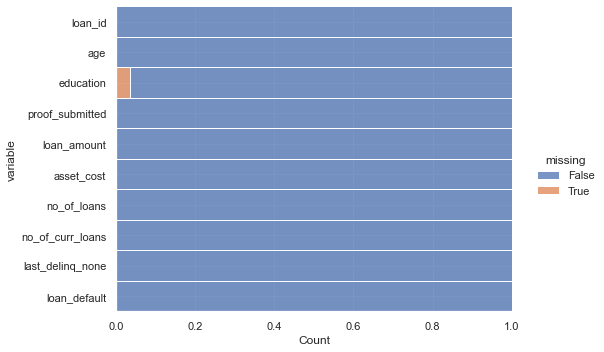

In [222]:
#Plotting the Missing values

plt.figure(figsize=(10,6))
sns.displot(
    data=Original_Train_data.isna().melt(value_name="missing"),bins=1000, y="variable",hue="missing",multiple="fill",aspect=1.5
           )
plt.show()

* Here we can see the **education** columns contains 245 null values

## Checking the Outliers and Plotting

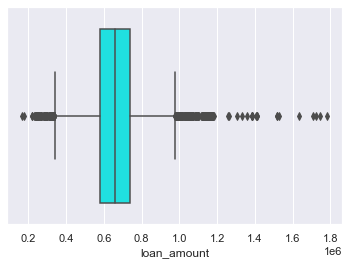

In [223]:
# Here we can plotting Boxplot for Loan_Ammount

sns.boxplot(x=Original_Train_data['loan_amount'],color='Cyan')

plt.show()

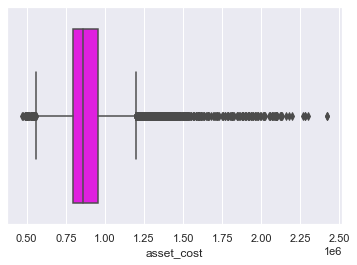

In [224]:
# Here we can plotting Boxplot for asset_cost

sns.boxplot(data =Original_Train_data, x = 'asset_cost', color='Magenta')

plt.show()

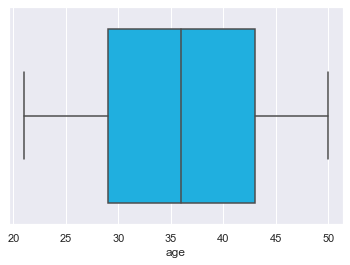

In [225]:
# Here we can plotting Boxplot for age

sns.boxplot(x=Original_Train_data['age'],color='DeepSkyBlue')

plt.show()

## Checking the Data Balanced  or Not

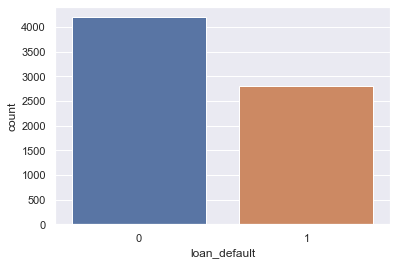

In [226]:
# Plot the count of loan_default

sns.countplot(x="loan_default", data=Original_Train_data)

plt.show()

* Here we can see most of the customers not able to reapy the loan 

* Here 4200 customer loan is defaulted and 2800 customers likely to repay the loan

C:\Users\Bharatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


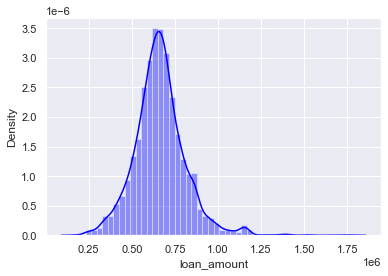

In [227]:
# plotting the distibution for loan_amount column

sns.distplot(Original_Train_data['loan_amount'],color='blue')

plt.show()

* Here we can see the **loan_amount** is mostly normally distributed

C:\Users\Bharatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


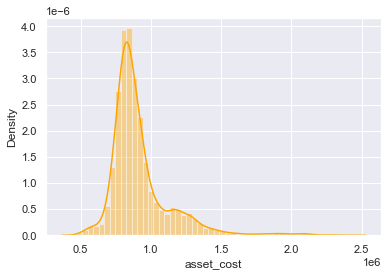

In [228]:
# plotting the distibution for asset_cost column

sns.distplot(Original_Train_data['asset_cost'],color='orange')

plt.show()

* Here we can see the **asset_cost** is mostly Right Skewed

<AxesSubplot:xlabel='loan_amount', ylabel='asset_cost'>

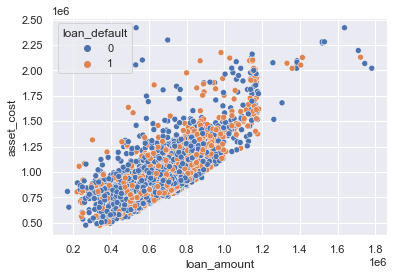

In [229]:
sns.scatterplot(data=Original_Train_data, x="loan_amount", y="asset_cost",hue='loan_default')

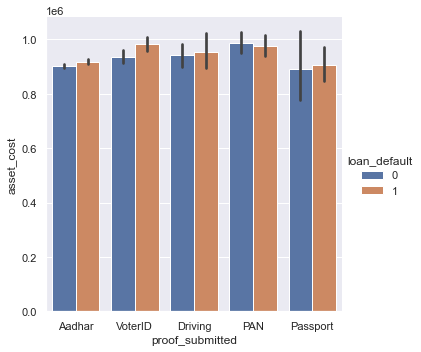

In [230]:

sns.catplot(x="proof_submitted",y = 'asset_cost',hue="loan_default", kind="bar", data=Original_Train_data)

## DATA PREPROCESSING

In [231]:
# Our original dataframe

Train_data1 = Train_data.copy()

Train_data1.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [232]:
# Removing the Loan id because no use for prediction

Train_data1 =Train_data1.drop('loan_id',axis=1)

# Displaying  after removing loan id

Train_data1.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [233]:
# #Removing the outliers using IQR method

# cols = ['asset_cost','loan_amount']

# Q1 = np.percentile(Train_data1[cols] , 25)
# Q3 = np.percentile(Train_data1[cols], 75)

# IQR = Q3 - Q1

# Train_data1 = Train_data1[~((Train_data1[cols] < (Q1 - 1.5 * IQR)) |(Train_data1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [234]:
# Missing value imputation wit mean

Train_data1 = Train_data1.fillna(Train_data1['education'].mode()[0])

#Checking after imputation of missing value is their or not

Train_data1.isnull().sum()

age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [235]:
Train_data1.shape

(7000, 9)

## Encoding for categorical data

In [236]:
#For categorical data convert into binary we can use get_dummies

Train_data2 = pd.get_dummies(Train_data1,drop_first=True)

Train_data2.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,27,1.0,504264,820920,2,2,0,0,0,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0,0,0,0
2,30,2.0,642936,826092,0,0,0,1,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0,0,0,0


In [237]:
# Shape of after encoding 

Train_data2.shape

(7000, 12)

In [238]:
# Split data into target and features

x = Train_data2.drop('loan_default',axis =1) # Features

y = Train_data2[['loan_default']] # Target

In [239]:
#Importing SMOTE

from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority')

# Fit the model to generate the data.

x,y = sm.fit_resample(x,y)

In [240]:
# StandardScaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
scaler.fit(x)
X = scaler.fit_transform(x)

## Train Test Split

In [275]:
# split data into train subset and test subset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print("Shape of X_train  is :",X_train.shape)
print("Shape of X_test is:",X_test.shape)
print("Shape of y_train is :",y_train.shape)
print("Shape of y_test is :",y_test.shape)

Shape of X_train  is : (5880, 11)
Shape of X_test is: (2520, 11)
Shape of y_train is : (5880, 1)
Shape of y_test is : (2520, 1)


## Building a model

In [272]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3 ,n_jobs=2,algorithm='kd_tree',weights ='distance')  
classifier.fit(X_train, y_train)  

C:\Users\Bharatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree', n_jobs=2, p=3, weights='distance')

In [273]:
#Predict model using X_test

prediction = classifier.predict(X_test)

In [274]:
#Classification Report for the model

from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       877
           1       0.57      0.61      0.59       803

    accuracy                           0.59      1680
   macro avg       0.59      0.59      0.59      1680
weighted avg       0.60      0.59      0.59      1680



### Random Forest

In [276]:
#Importing the RandomForestClassifier from sklearn

from sklearn.ensemble import RandomForestClassifier   
RF_Model = RandomForestClassifier(criterion='entropy',random_state=42,n_jobs=-1,max_depth =100,
                                    max_features = 2,min_samples_leaf = 3,min_samples_split = 10,n_estimators=1000)
RF_Model.fit(X_train,y_train) 

C:\Users\BHARAT~1\AppData\Local\Temp/ipykernel_18512/1740706.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=100, max_features=2,
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [277]:
#Predict model using X_test

prediction = RF_Model.predict(X_test)

In [278]:
prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Classification Report

In [279]:
#Classification Report for the model

from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1320
           1       0.61      0.58      0.59      1200

    accuracy                           0.62      2520
   macro avg       0.62      0.62      0.62      2520
weighted avg       0.62      0.62      0.62      2520



## Confusion Matrix

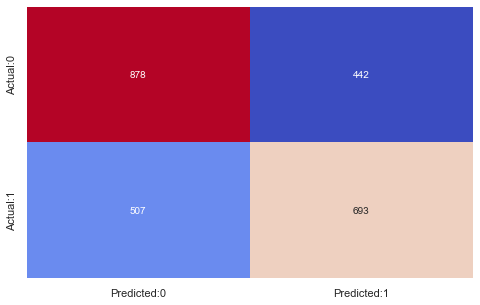

In [280]:
# compute the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.show()

## ROC Curve

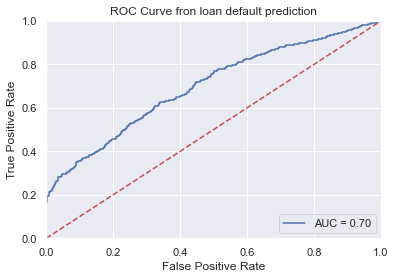

In [183]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve fron loan default prediction')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Inference

In [184]:
#Load the data 
Test_data = pd.read_csv('Data Set/test_4zJg83n.csv')

#Display the dataframe
Test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [185]:
# Checking the shape of the dataframe

Test_data.shape

(3000, 9)

In [186]:
#Here we can see the data type of the features

Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         2908 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


In [187]:
# By using Describe we can see the suumary of the numerical data

Test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,3000.0,8500.500000,866.169729,7001.0,7750.75,8500.5,9250.25,10000.0
age,3000.0,36.111000,7.467347,21.0,30.00,36.0,42.00,50.0
education,2908.0,1.563618,0.496022,1.0,1.00,2.0,2.00,2.0
loan_amount,3000.0,662929.428000,145100.871195,169680.0,580188.00,654156.0,731559.00,1576920.0
asset_cost,3000.0,910600.048000,207027.831407,470604.0,793071.00,856908.0,950136.00,2358180.0
no_of_loans,3000.0,2.819000,5.329575,0.0,0.00,0.0,4.00,92.0
no_of_curr_loans,3000.0,1.374333,2.218825,0.0,0.00,0.0,2.00,32.0
last_delinq_none,3000.0,0.014333,0.118881,0.0,0.00,0.0,0.00,1.0


In [188]:
# Summary of categorigal data

Test_data.describe(include = object)


,proof_submitted
count,3000
unique,5
top,Aadhar
freq,2545


In [189]:
#Checking the missing values 

Test_data.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [190]:
#Copying the ID for furtur reference

ID = Test_data[['loan_id']].copy()
ID.head()

,loan_id
0,7001
1,7002
2,7003
3,7004
4,7005


In [191]:
# Removing the Loan id because no use for prediction

Test_data =Test_data.drop('loan_id',axis=1)

# Displaying  after removing loan id

Test_data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,Aadhar,636936,768240,2,2,0
1,28,1.0,Aadhar,548988,693060,3,3,0
2,28,1.0,Aadhar,651756,936600,0,0,0
3,45,2.0,Aadhar,614676,744840,4,3,0
4,48,1.0,Aadhar,625236,839400,0,0,0


In [192]:
# Missing value imputation wit mean

Test_data = Test_data.fillna(Test_data['education'].mode()[0])

#Checking after imputation of missing value is their or not

Test_data.isnull().sum()

age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

In [193]:
#For categorical data convert into binary we can use get_dummies

Test_data = pd.get_dummies(Test_data,drop_first=True)

Test_data.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,29,1.0,636936,768240,2,2,0,0,0,0,0
1,28,1.0,548988,693060,3,3,0,0,0,0,0
2,28,1.0,651756,936600,0,0,0,0,0,0,0
3,45,2.0,614676,744840,4,3,0,0,0,0,0
4,48,1.0,625236,839400,0,0,0,0,0,0,0


In [194]:
#shape after encoding

Test_data.shape

(3000, 11)

In [195]:
# Robust Scaling

Test_data_Scaled = scaler.transform(Test_data)

In [281]:
#Predict using Model

Predict_Test  = RF_Model.predict(Test_data_Scaled)
Predict_Test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [282]:
#Creating the dataframe for prediction

dataframe = pd.DataFrame(Predict_Test,columns=['loan_default'])
dataframe.head()

,loan_default
0,0
1,0
2,0
3,0
4,1


In [283]:
#Concate the two dataframe
DataFrame = pd.concat([ID,dataframe],axis=1)
DataFrame.head()

,loan_id,loan_default
0,7001,0
1,7002,0
2,7003,0
3,7004,0
4,7005,1


In [271]:
#Converting the dataframe into csv file

DataFrame.to_csv("KNN_Prediction.csv",index=False)